In [1]:
 using Images, TestImages,ImageView

In [2]:
using Latexify

In [63]:
function lat(x)
    print('$')
    print(latexify(string(x)))
    print('$')
end

lat (generic function with 1 method)

In [167]:
img = testimage("mandrill");

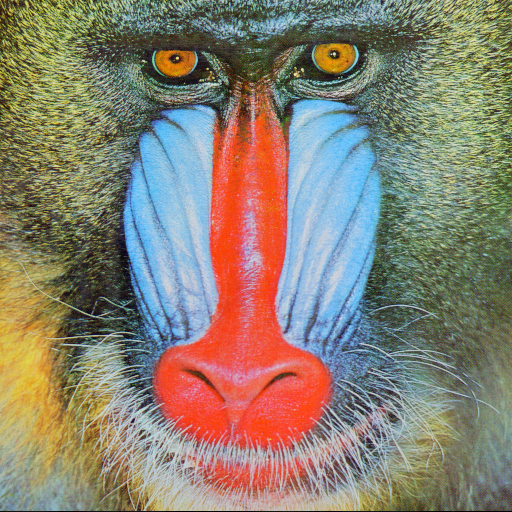

In [168]:
img

In [107]:
img = [0 1 2 ; 3 4 5; 6 7 8]

3×3 Array{Int64,2}:
 0  1  2
 3  4  5
 6  7  8

In [108]:
size(img)

(3, 3)

In [109]:
kernel = [0 1 ; 2 3]

2×2 Array{Int64,2}:
 0  1
 2  3

In [131]:
[0 1 ; 6 12]

2×2 Array{Int64,2}:
 0   1
 6  12

# Conv2D

In [139]:
lat("input_h+(2*pad_h),input_w+(2*pad_w)")

$$input_{h} + 2 \cdot pad_{h}, input_{w} + 2 \cdot pad_{w}$$

In [141]:
input_h, input_w = size(img)
kernel_h, kernel_w = size(kernel)

pad_h = (kernel_h-1) ÷ 2
pad_w = (kernel_w-1) ÷ 2

img_padded = zeros(input_h+(2*pad_h),input_w+(2*pad_w))

3×3 Array{Float64,2}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

In [160]:
tm2 = imshow(img_padded)

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>710: "map(clim-mapped image, inpu…
  "annotations" => 676: "input-278" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 675: "CLim" = CLim{Float64}(0.0, 1.0) CLim{Float64} 

In [161]:
write_to_png(tm2, "/home/subhaditya/Desktop/GITHUB/SubhadityaMukherjee.github.io/img/deconstrucImages/padded.png")

0

In [162]:
function conv2d(img, kernel, stride = 1, padding = "valid")
    input_h, input_w = size(img)
    kernel_h, kernel_w = size(kernel)
    
    if padding == "same"
        pad_h = (kernel_h-1) ÷ 2
        pad_w = (kernel_w-1) ÷ 2
        
        img_padded = zeros(input_h+(2*pad_h),input_w+(2*pad_w))
        
        for i in 1:input_h , j in 1:input_w
            img_padded[i+pad_h, j+pad_w] = img[i,j]
        end
        
    elseif padding == "valid"
    else
        throw(DomainError(padding, "Invalid padding value"))
    end
    
    result = zeros((input_h- kernel_h) ÷ stride +1 ,(input_w- kernel_w) ÷ stride +1 )
    result_h, result_w = size(result)
    
    ih, iw = 1, 1
    for i in 1: result_h
        for j in 1: result_w
            for k in 1:kernel_h
                for l in 1:kernel_w
                    result[i,j] += img[ih+k-1, iw+l-1]*kernel[k,l]
                end
            end
            ih+=stride
        end
        iw+= stride
        ih = 1
    end
    return result
end
        
        

conv2d (generic function with 3 methods)

In [169]:
conv2d(img , kernel)

MethodError: MethodError: no method matching +(::Float64, ::RGB{Float32})
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529
  +(::Float64, !Matched::Float64) at float.jl:401
  +(::AbstractFloat, !Matched::Bool) at bool.jl:106
  ...

In [127]:
using Cairo,Gtk

In [164]:
tm2 = imshow(conv2d(img , kernel))

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>747: "map(clim-mapped image, inpu…
  "annotations" => 713: "input-290" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 712: "CLim" = CLim{Float64}(19.0, 43.0) CLim{Float64} 

In [155]:
function write_to_png(guidict, filename)
    canvas = guidict["gui"]["canvas"]
    ctx = getgc(canvas)
    Cairo.write_to_png(ctx.surface, filename)
end

write_to_png (generic function with 1 method)

In [165]:
write_to_png(tm2, "/home/subhaditya/Desktop/GITHUB/SubhadityaMukherjee.github.io/img/deconstrucImages/temp.png")

0

In [184]:
kernel_blur = [-2 -1 0; -1 1 1; 0 1 2]

3×3 Array{Int64,2}:
 -2  -1  0
 -1   1  1
  0   1  2

In [185]:
tm2 = imshow(conv2d(channelview(Gray.(img)),kernel_blur))

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>822: "map(clim-mapped image, inpu…
  "annotations" => 788: "input-386" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 787: "CLim" = CLim{Float64}(-2.14902, 3.4) CLim{Float64} 

In [186]:
write_to_png(tm2, "/home/subhaditya/Desktop/GITHUB/SubhadityaMukherjee.github.io/img/deconstrucImages/mandblur.png")

0

In [180]:
tm2 = imshow(img)

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>748: "map(clim-mapped image, inpu…
  "annotations" => 701: "input-362" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 700: "CLim" = CLim{RGB{Float64}}(RGB{Float64}(0.0,0.0,0.0), …

In [176]:
write_to_png(tm2, "/home/subhaditya/Desktop/GITHUB/SubhadityaMukherjee.github.io/img/deconstrucImages/mandorig.png")

0

In [84]:
latexify("input_h+(2*pad_h),input_w+(2*pad_c)")

L"$input_{h} + 2 \cdot pad_{h}, input_{w} + 2 \cdot pad_{c}$"

# Kernels

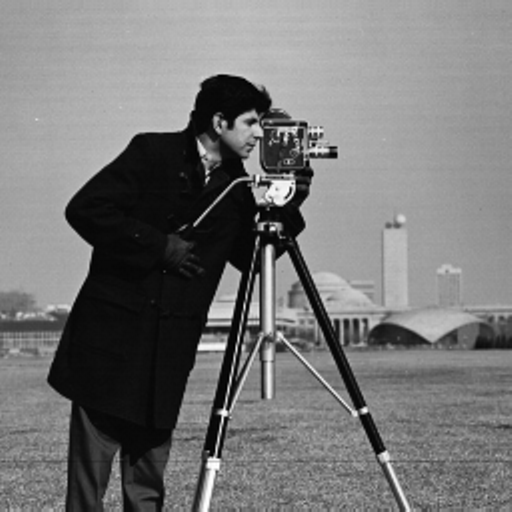

In [192]:
img = testimage("cameraman");img

In [193]:
tm2 = imshow(img)

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>859: "map(clim-mapped image, inpu…
  "annotations" => 825: "input-398" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 824: "CLim" = CLim{Normed{UInt8,8}}(0.0, 1.0) CLim{Normed{UI…

In [194]:
write_to_png(tm2, "/home/subhaditya/Desktop/GITHUB/SubhadityaMukherjee.github.io/img/deconstrucImages/cam.png")

0

In [197]:
kernel_blur = [0.0625 0.125 0.0625; 0.125 0.25 0.125; 0.0625 0.125 0.0625]

3×3 Array{Float64,2}:
 0.0625  0.125  0.0625
 0.125   0.25   0.125
 0.0625  0.125  0.0625

In [198]:
tm2 = imshow(conv2d(channelview(Gray.(img)),kernel_blur))

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>896: "map(clim-mapped image, inpu…
  "annotations" => 862: "input-410" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 861: "CLim" = CLim{Float64}(0.0134804, 0.990441) CLim{Float6…

In [199]:
write_to_png(tm2, "/home/subhaditya/Desktop/GITHUB/SubhadityaMukherjee.github.io/img/deconstrucImages/camdblur.png")

0

In [200]:
kernel_blur = [-1 -2 -1 ; 0 0 0 ; 1 2 1]

3×3 Array{Int64,2}:
 -1  -2  -1
  0   0   0
  1   2   1

In [201]:
tm2 = imshow(conv2d(channelview(Gray.(img)),kernel_blur))

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>933: "map(clim-mapped image, inpu…
  "annotations" => 899: "input-422" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 898: "CLim" = CLim{Float64}(-2.7451, 2.97255) CLim{Float64} 

In [202]:
write_to_png(tm2, "/home/subhaditya/Desktop/GITHUB/SubhadityaMukherjee.github.io/img/deconstrucImages/botsob.png")

0

In [203]:
kernel_blur = [-2 -1 0 ; -1 1 1 ; 0 1 2]

3×3 Array{Int64,2}:
 -2  -1  0
 -1   1  1
  0   1  2

In [204]:
tm2 = imshow(conv2d(channelview(Gray.(img)),kernel_blur))

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>970: "map(clim-mapped image, inpu…
  "annotations" => 936: "input-434" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 935: "CLim" = CLim{Float64}(-2.26275, 3.25098) CLim{Float64} 

In [205]:
write_to_png(tm2, "/home/subhaditya/Desktop/GITHUB/SubhadityaMukherjee.github.io/img/deconstrucImages/emb.png")

0

In [203]:
kernel_blur = [-2 -1 0 ; -1 1 1 ; 0 1 2]

3×3 Array{Int64,2}:
 -2  -1  0
 -1   1  1
  0   1  2

In [204]:
tm2 = imshow(conv2d(channelview(Gray.(img)),kernel_blur))

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>970: "map(clim-mapped image, inpu…
  "annotations" => 936: "input-434" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 935: "CLim" = CLim{Float64}(-2.26275, 3.25098) CLim{Float64} 

In [205]:
write_to_png(tm2, "/home/subhaditya/Desktop/GITHUB/SubhadityaMukherjee.github.io/img/deconstrucImages/emb.png")

0

In [206]:
kernel_blur = [0 0 0 ;  0 1 0; 0  0 0]

3×3 Array{Int64,2}:
 0  0  0
 0  1  0
 0  0  0

In [207]:
tm2 = imshow(conv2d(channelview(Gray.(img)),kernel_blur))

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>1007: "map(clim-mapped image, inp…
  "annotations" => 973: "input-446" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 972: "CLim" = CLim{Float64}(0.0, 1.0) CLim{Float64} 

In [208]:
write_to_png(tm2, "/home/subhaditya/Desktop/GITHUB/SubhadityaMukherjee.github.io/img/deconstrucImages/iden.png")

0

In [209]:
kernel_blur = [-1 0 -1 ; -2 0 -2; 1 0 -1]

3×3 Array{Int64,2}:
 -1  0  -1
 -2  0  -2
  1  0  -1

In [210]:
tm2 = imshow(conv2d(channelview(Gray.(img)),kernel_blur))

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>1044: "map(clim-mapped image, inp…
  "annotations" => 1010: "input-458" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 1009: "CLim" = CLim{Float64}(-5.98039, 0.0823529) CLim{Float…

In [211]:
write_to_png(tm2, "/home/subhaditya/Desktop/GITHUB/SubhadityaMukherjee.github.io/img/deconstrucImages/lesob.png")

0

In [212]:
kernel_blur = [-1 -1 -1 ; -1 8 -1 ; -1 -1 -1]

3×3 Array{Int64,2}:
 -1  -1  -1
 -1   8  -1
 -1  -1  -1

In [213]:
tm2 = imshow(conv2d(channelview(Gray.(img)),kernel_blur))

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>1081: "map(clim-mapped image, inp…
  "annotations" => 1047: "input-470" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 1046: "CLim" = CLim{Float64}(-2.23529, 2.2) CLim{Float64} 

In [214]:
write_to_png(tm2, "/home/subhaditya/Desktop/GITHUB/SubhadityaMukherjee.github.io/img/deconstrucImages/out.png")

0

In [215]:
kernel_blur = [-1 0 1 ; -2 0 2 ; -1 0 1]

3×3 Array{Int64,2}:
 -1  0  1
 -2  0  2
 -1  0  1

In [216]:
tm2 = imshow(conv2d(channelview(Gray.(img)),kernel_blur))

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>1118: "map(clim-mapped image, inp…
  "annotations" => 1084: "input-482" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 1083: "CLim" = CLim{Float64}(-3.29412, 3.34118) CLim{Float64…

In [217]:
write_to_png(tm2, "/home/subhaditya/Desktop/GITHUB/SubhadityaMukherjee.github.io/img/deconstrucImages/rsob.png")

0

In [218]:
kernel_blur = [0 -1 0 ; -1 5 -1 ; 0 -1 0]

3×3 Array{Int64,2}:
  0  -1   0
 -1   5  -1
  0  -1   0

In [219]:
tm2 = imshow(conv2d(channelview(Gray.(img)),kernel_blur))

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>1155: "map(clim-mapped image, inp…
  "annotations" => 1121: "input-494" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 1120: "CLim" = CLim{Float64}(-0.764706, 1.67843) CLim{Float6…

In [220]:
write_to_png(tm2, "/home/subhaditya/Desktop/GITHUB/SubhadityaMukherjee.github.io/img/deconstrucImages/shar.png")

0

In [221]:
kernel_blur = [1 2 1 ; 0 0 0 ; -1 -2 -1]

3×3 Array{Int64,2}:
  1   2   1
  0   0   0
 -1  -2  -1

In [222]:
tm2 = imshow(conv2d(channelview(Gray.(img)),kernel_blur))

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>1192: "map(clim-mapped image, inp…
  "annotations" => 1158: "input-506" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 1157: "CLim" = CLim{Float64}(-2.97255, 2.7451) CLim{Float64} 

In [223]:
write_to_png(tm2, "/home/subhaditya/Desktop/GITHUB/SubhadityaMukherjee.github.io/img/deconstrucImages/tsob.png")

0

# Convolve two images??? :o

In [259]:
262144/(8*8)

4096.0

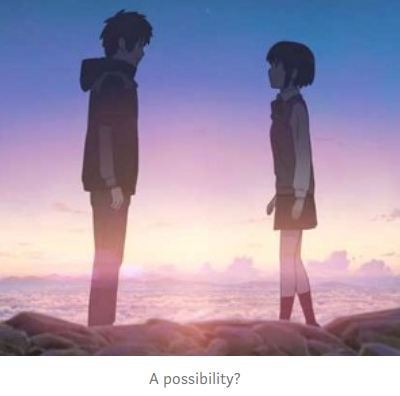

In [297]:
im2 = Images.load("/media/subhaditya/DATA/GITHUB/SubhadityaMukherjee.github.io/img/dat.png")

In [334]:
tmp_cm =  channelview(Gray.(testimage("autumn_leaves")));

In [335]:
tmp_cm2 = channelview(Gray.(testimage("mandrill")));

In [303]:
kernel = [0 1 0; 0 1 0; 0 1 0]

3×3 Array{Int64,2}:
 0  1  0
 0  1  0
 0  1  0

In [305]:
conv2d(Gray.(tmp_cm),kernel)

510×510 Array{Float64,2}:
 2.39216  2.4  2.40784  2.41176  2.41176  …  2.39608   2.36863   2.32941
 2.39216  2.4  2.40784  2.41176  2.41176     2.4       2.38824   2.37647
 2.39216  2.4  2.40784  2.41176  2.41176     2.40392   2.39608   2.39216
 2.39216  2.4  2.40784  2.41176  2.41176     2.40392   2.40784   2.41176
 2.39216  2.4  2.40784  2.41176  2.41176     2.39216   2.4       2.40784
 2.39216  2.4  2.40784  2.41176  2.41176  …  2.40392   2.4       2.40392
 2.39216  2.4  2.40784  2.41176  2.41176     2.40392   2.4       2.4
 2.39216  2.4  2.40784  2.41176  2.41176     2.41569   2.41176   2.41176
 2.39216  2.4  2.40784  2.41176  2.41176     2.41176   2.41176   2.41176
 2.39216  2.4  2.40784  2.41176  2.41176     2.40392   2.41176   2.41961
 2.39216  2.4  2.40784  2.41176  2.41176  …  2.38039   2.39608   2.40784
 2.39216  2.4  2.40784  2.41176  2.41176     2.36471   2.38431   2.4
 2.39216  2.4  2.40784  2.41176  2.41176     2.32157   2.34902   2.37647
 ⋮                               

In [308]:
kernel = [
-1 0 1 ;
-2 0 2 ; 
-1 0 1
]

3×3 Array{Int64,2}:
 -1  0  1
 -2  0  2
 -1  0  1

In [310]:
imshow(conv2d(tmp_cm2,kernel))

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>2060: "map(clim-mapped image, inp…
  "annotations" => 2026: "input-791" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 2025: "CLim" = CLim{Float64}(-2.6, 2.45882) CLim{Float64} 

In [311]:
imshow(conv2d(conv2d(tmp_cm2,kernel),kernel))

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>2097: "map(clim-mapped image, inp…
  "annotations" => 2063: "input-803" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 2062: "CLim" = CLim{Float64}(-8.41176, 8.02745) CLim{Float64…

# Make it work for color?

In [314]:
using DSP

┌ Info: Precompiling DSP [717857b8-e6f2-59f4-9121-6e50c889abd2]
└ @ Base loading.jl:1260


In [354]:
tmp_cm = channelview(Gray.(testimage("house")));

In [355]:
tmp_cm2 = channelview(Gray.(testimage("mandrill")));

In [365]:
tm2 = imshow(DSP.conv(tmp_cm2,tmp_cm))

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>2778: "map(clim-mapped image, inp…
  "annotations" => 2744: "input-1061" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 2743: "CLim" = CLim{Float32}(0.0124569, 72661.0) CLim{Float3…

In [358]:
tm2 = imshow(tmp_cm)

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>2667: "map(clim-mapped image, inp…
  "annotations" => 2633: "input-1025" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 2632: "CLim" = CLim{Normed{UInt8,8}}(0.0, 0.996) CLim{Normed…

In [360]:
write_to_png(tm2, "/home/subhaditya/Desktop/GITHUB/SubhadityaMukherjee.github.io/img/deconstrucImages/2conv.png")

0

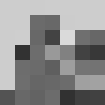

In [378]:
ImageTransformations.imresize(Gray.(testimage("house")),(7,7))ImageTransformations.imresize(Gray.(testimage("house")),(7,7))

In [380]:
tm2 = imshow(DSP.conv(tmp_cm2,channelview(ImageTransformations.imresize(Gray.(testimage("house")),(15,15)))))

Dict{String,Any} with 4 entries:
  "gui"         => Dict{String,Any}("window"=>GtkWindowLeaf(name="", parent, wi…
  "roi"         => Dict{String,Any}("redraw"=>2852: "map(clim-mapped image, inp…
  "annotations" => 2818: "input-1085" = Dict{UInt64,Any}() Dict{UInt64,Any} 
  "clim"        => 2817: "CLim" = CLim{Float32}(0.0, 94.5531) CLim{Float32} 

In [381]:
write_to_png(tm2, "/home/subhaditya/Desktop/GITHUB/SubhadityaMukherjee.github.io/img/deconstrucImages/2convm.png")

0

In [71]:
temp = []

0-element Array{Any,1}

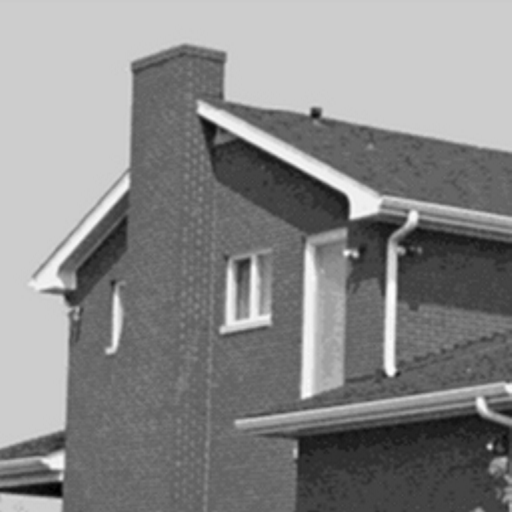

In [93]:
Gray.(testimage("house"))

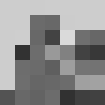

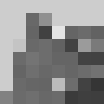

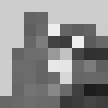

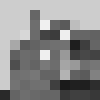

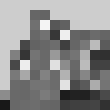

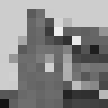

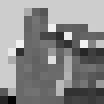

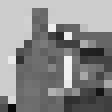

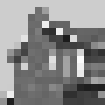

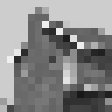

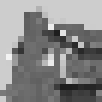

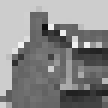

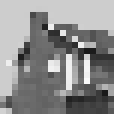

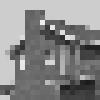

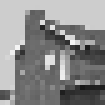

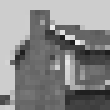

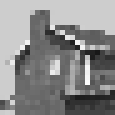

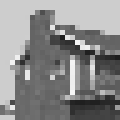

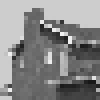

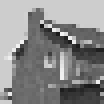

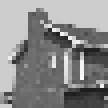

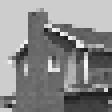

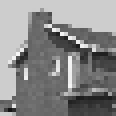

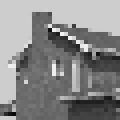

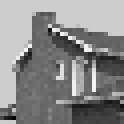

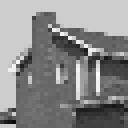

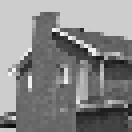

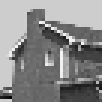

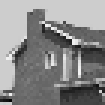

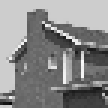

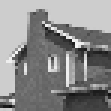

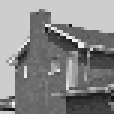

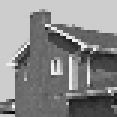

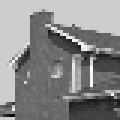

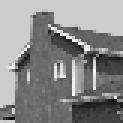

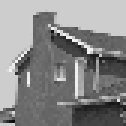

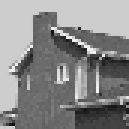

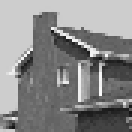

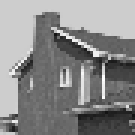

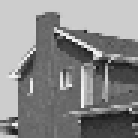

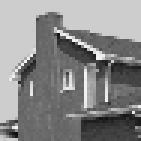

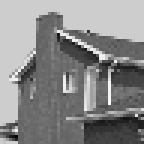

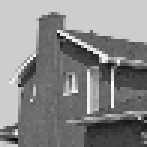

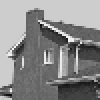

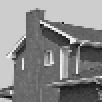

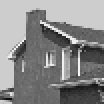

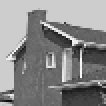

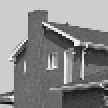

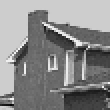

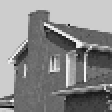

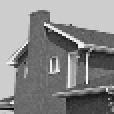

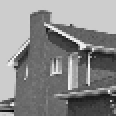

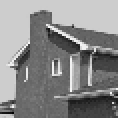

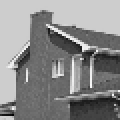

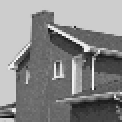

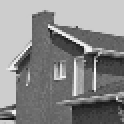

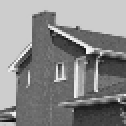

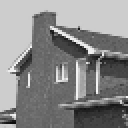

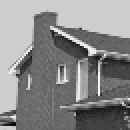

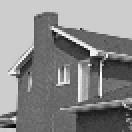

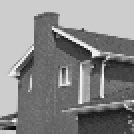

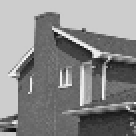

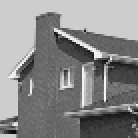

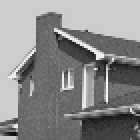

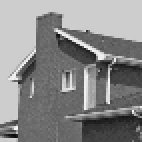

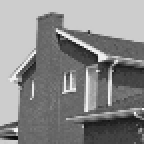

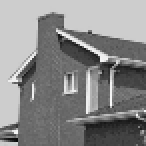

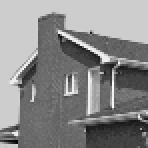

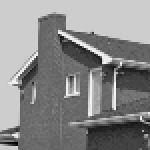

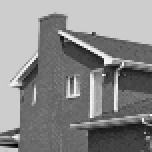

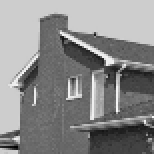

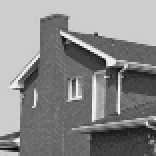

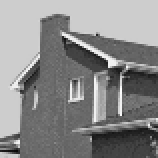

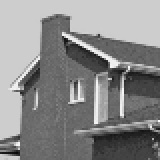

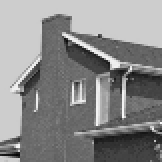

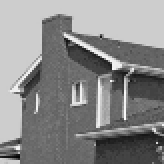

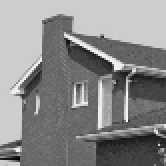

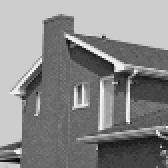

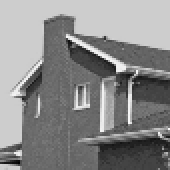

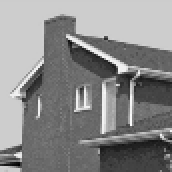

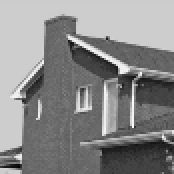

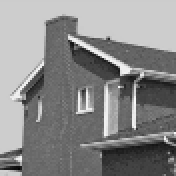

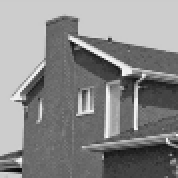

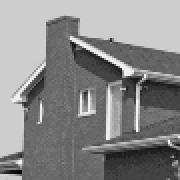

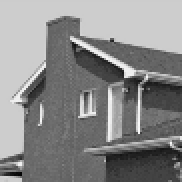

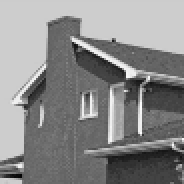

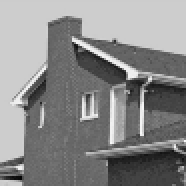

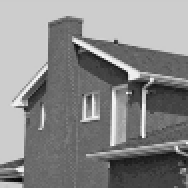

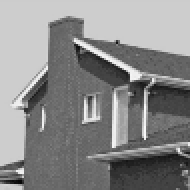

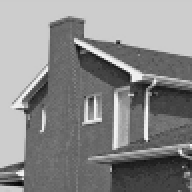

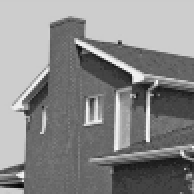

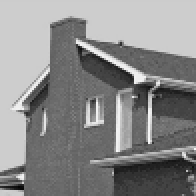

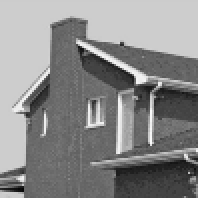

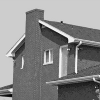

In [92]:
### for i in collect(7:100)
    display(ImageTransformations.imresize(Gray.(testimage("house")),(i,i)))
end

In [41]:
using Plots

┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1260


In [67]:
IJulia.clear_output(true)

0